In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd


In [2]:
folders=sorted(glob.glob("/home/saab/Desktop/2024_UWR/Analysis/CSVs/*th_Nov_images/*"))
folders

['/home/saab/Desktop/2024_UWR/Analysis/CSVs/13th_Nov_images/output_1300',
 '/home/saab/Desktop/2024_UWR/Analysis/CSVs/13th_Nov_images/output_1301',
 '/home/saab/Desktop/2024_UWR/Analysis/CSVs/13th_Nov_images/output_1302',
 '/home/saab/Desktop/2024_UWR/Analysis/CSVs/13th_Nov_images/output_1304',
 '/home/saab/Desktop/2024_UWR/Analysis/CSVs/13th_Nov_images/output_1305',
 '/home/saab/Desktop/2024_UWR/Analysis/CSVs/6th_Nov_images/output_1159',
 '/home/saab/Desktop/2024_UWR/Analysis/CSVs/6th_Nov_images/output_1203',
 '/home/saab/Desktop/2024_UWR/Analysis/CSVs/6th_Nov_images/output_1205',
 '/home/saab/Desktop/2024_UWR/Analysis/CSVs/6th_Nov_images/output_1219',
 '/home/saab/Desktop/2024_UWR/Analysis/CSVs/6th_Nov_images/output_1236',
 '/home/saab/Desktop/2024_UWR/Analysis/CSVs/6th_Nov_images/output_1238',
 '/home/saab/Desktop/2024_UWR/Analysis/CSVs/6th_Nov_images/output_1306',
 '/home/saab/Desktop/2024_UWR/Analysis/CSVs/6th_Nov_images/output_1308']

In [7]:

# Set the path to the folder containing your images
for image_folder in folders:
    #image_folder = "/home/saab/Desktop/output"
    print(image_folder)
    # Use glob to get all the image file paths in the folder
    image_files = sorted(glob.glob(os.path.join(image_folder, "*.png")))  # Adjust extension if needed (e.g., .jpg, .jpeg)

    # Initialize an empty list to store displacements
    displacements_x = []
    displacements_y = []
    displacements=[]
    div_flows=[]
    # Load the first frame
    prev_frame = cv2.imread(image_files[0], cv2.IMREAD_GRAYSCALE)

    # Iterate through the image sequence
    for i in range(1, len(image_files)):
        print(i,end=" ")
        # Load the next frame
        next_frame = cv2.imread(image_files[i], cv2.IMREAD_GRAYSCALE)
        
        # Calculate optical flow using Farneback method
        flow = cv2.calcOpticalFlowFarneback(prev_frame, next_frame, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        
        # Extract flow in x and y directions
        flow_x = flow[..., 0]
        flow_y = flow[..., 1]
        
        # Compute the displacement (magnitude of the flow vector)
        displacement = np.sqrt(flow_x**2 + flow_y**2)
        
        
        # Store the average displacement for the frame
        displacements.append(np.mean(displacement))
        displacements_x.append(np.mean(flow_x))
        displacements_y.append(np.mean(flow_y))
        grad_vx_y, grad_vx_x = np.gradient(flow_x)  # Gradients of flow_x
        grad_vy_y, grad_vy_x = np.gradient(flow_y)  # Gradients of flow_y

    # Divergence = ∂vx/∂x + ∂vy/∂y
        divergence = grad_vx_x + grad_vy_y

        div_flows.append(np.mean(divergence))
        # Update the previous frame to the current one
        prev_frame = next_frame
    
    df=pd.DataFrame({"X":displacements_x,"Y":displacements_y,"Z":div_flows})
    df.to_csv(image_folder+".csv",index=False)
    # Print or return the displacements for each frame
    #for i, d in enumerate(displacements):
    #    print(f"Displacement between frame {i} and {i+1}: {d:.2f}")


/home/saab/Desktop/2024_UWR/Analysis/CSVs/13th_Nov_images/output_1300
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 26

In [4]:
displacements_y

[-0.1536256,
 -0.08882842,
 -0.058134057,
 -0.23130366,
 -0.038853005,
 0.069869936,
 -0.29649103,
 -0.0068719834,
 -0.023245977,
 0.0056515518]

In [ ]:

df=pd.DataFrame({"X":displacements_x,"Y":displacements_y,"Z":div_flows_mean})
df.to_csv(image_folder+".csv",index=False)

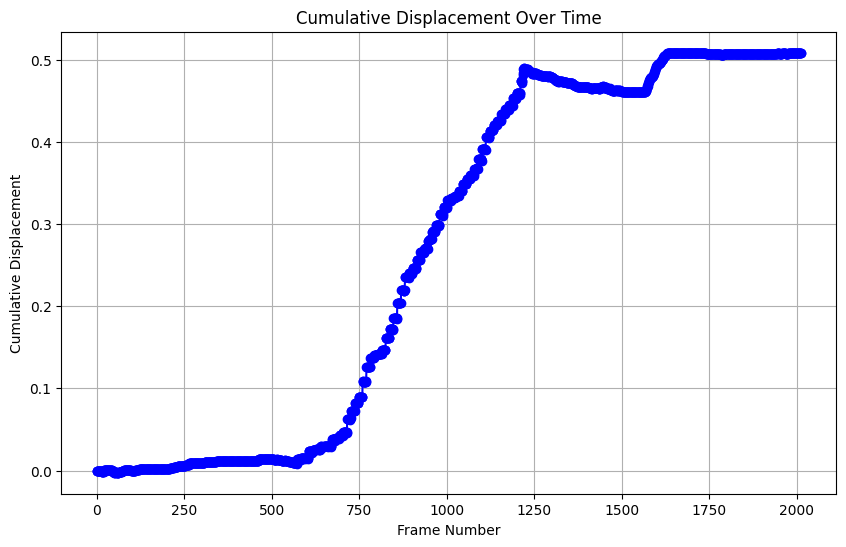

In [29]:
# Calculate cumulative displacement
cumulative_displacement = np.cumsum(div_flows_mean)*0.5/0.25

# Plot the cumulative displacement
plt.figure(figsize=(10, 6))
plt.plot(cumulative_displacement, marker='o', linestyle='-', color='b')
plt.title('Cumulative Displacement Over Time')
plt.xlabel('Frame Number')
plt.ylabel('Cumulative Displacement')
plt.grid(True)
plt.show()


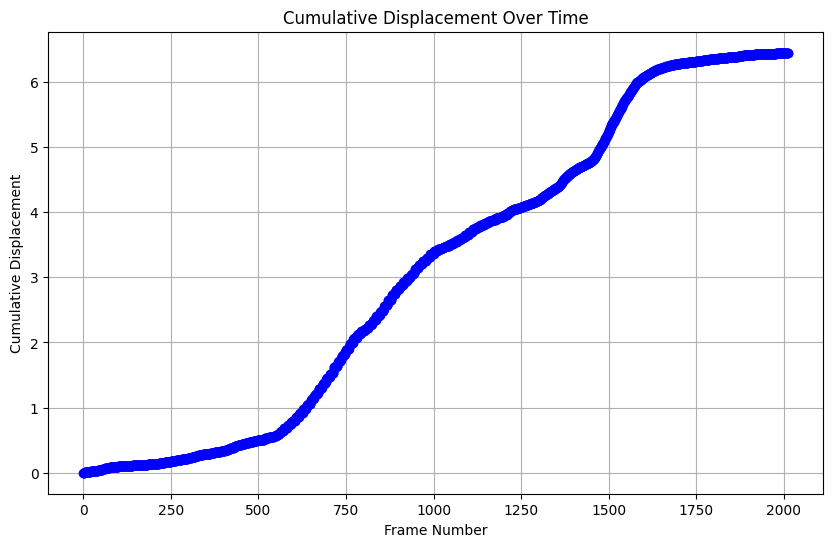

In [20]:
# Calculate cumulative displacement
cumulative_displacement = np.cumsum(displacements)*6.75/300

# Plot the cumulative displacement
plt.figure(figsize=(10, 6))
plt.plot(cumulative_displacement, marker='o', linestyle='-', color='b')
plt.title('Cumulative Displacement Over Time')
plt.xlabel('Frame Number')
plt.ylabel('Cumulative Displacement')
plt.grid(True)
plt.show()


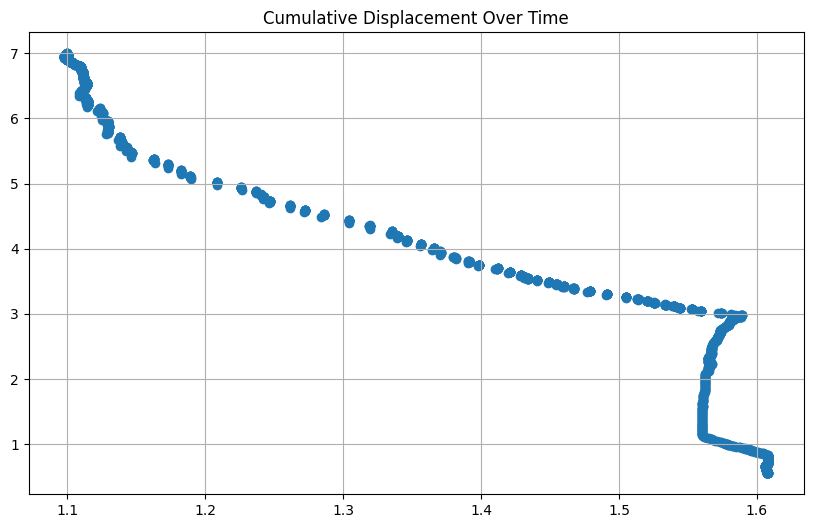

In [34]:
# Calculate cumulative displacement
cumulative_displacement_x = 1.1+np.cumsum(div_flows_mean)*0.5/0.25
cumulative_displacement_y =7- np.cumsum(displacements)*6.75/300
# Plot the cumulative displacement
plt.figure(figsize=(10, 6))
plt.scatter(cumulative_displacement_x,cumulative_displacement_y)
plt.title('Cumulative Displacement Over Time')
#plt.xlabel('Frame Number')
#plt.ylabel('Cumulative Displacement')
plt.grid(True)
plt.show()


0.0005
0.0005


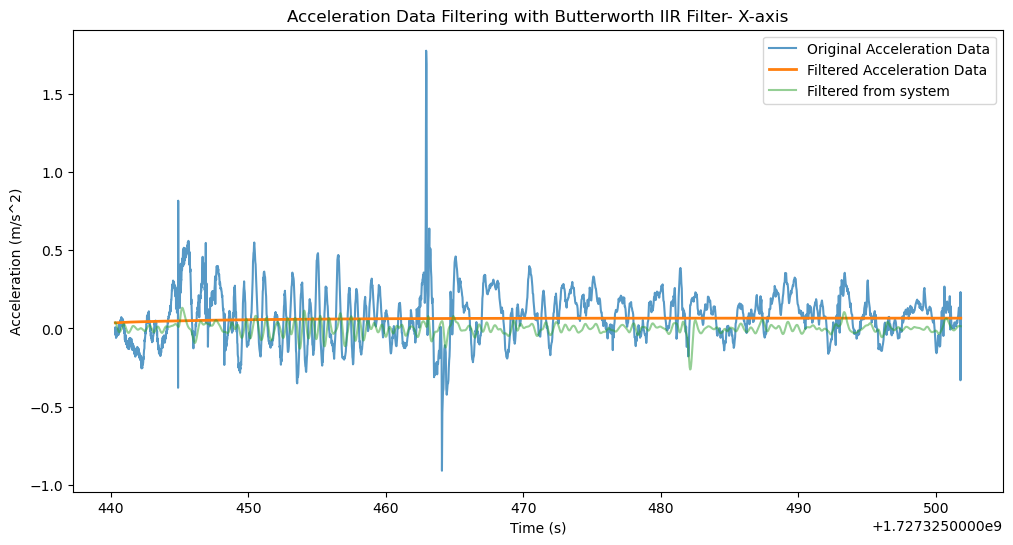

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import pandas as pd

df=pd.read_csv("/home/uwr/Desktop/output_IMU.csv")

# Sample acceleration data (replace with your actual data)
# Suppose your data is in an array called `acceleration_data` and sampled at `sample_rate` Hz
sample_rate = 200  # Hz, replace with actual sample rate
nyquist = 0.5 * sample_rate

# Butterworth Filter Design
def butterworth_filter(data, cutoff, order=4, filter_type='low'):
    normal_cutoff = cutoff / nyquist
    print(normal_cutoff)
    b, a = butter(order, normal_cutoff, btype=filter_type, analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Tuning parameters
cutoff_frequency = 0.05  # Hz, try different values to tune
order = 4  # filter order, higher means steeper roll-off

# Generate example data or use your actual IMU acceleration data
#t = np.linspace(0, 10, sample_rate * 10)  # 10 seconds of data
#acceleration_data = np.sin(2 * np.pi * 1 * t) + 0.5 * np.random.normal(size=t.shape)
t=np.array(df["Timestamp"])
acceleration_data=np.array(df["IMU_Linear_Acc_X"]-df["IMU_Linear_Acc_X"][0])

# Apply Butterworth filter
filtered_acceleration = butterworth_filter(acceleration_data, cutoff_frequency, order)
f2=butterworth_filter(filtered_acceleration,cutoff_frequency,order)

# Plot original vs filtered data
plt.figure(figsize=(12, 6))
plt.plot(t, acceleration_data, label="Original Acceleration Data", alpha=0.75)
plt.plot(t, filtered_acceleration, label="Filtered Acceleration Data", linewidth=2)
plt.plot(t,np.array(df["Filtered_X"]),label="Filtered from system",alpha=0.5)
#plt.plot(t, f2, label="f2", linewidth=2)
plt.title("Acceleration Data Filtering with Butterworth IIR Filter- X-axis")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s^2)")
plt.legend()
plt.show()


0.005
0.005


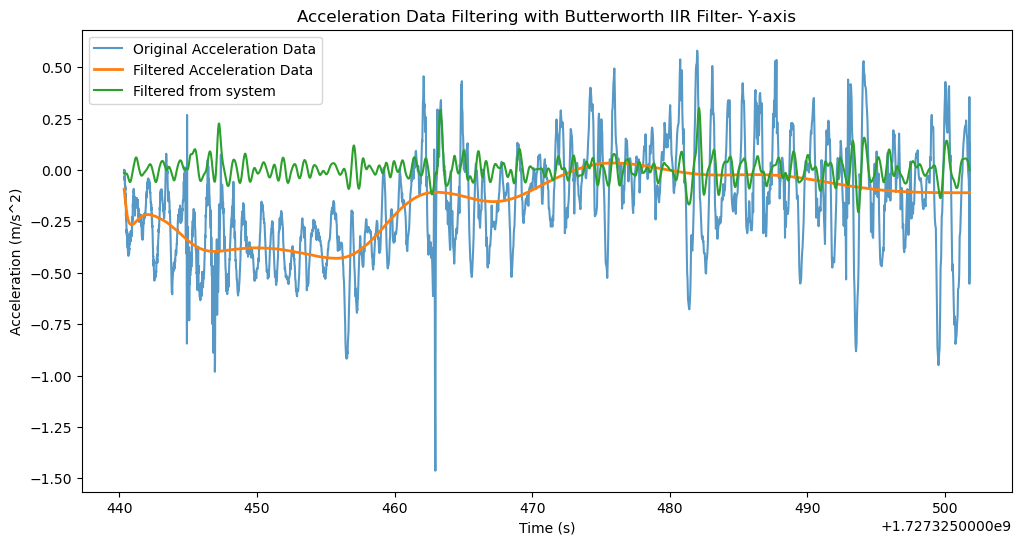

In [14]:
# Generate example data or use your actual IMU acceleration data
#t = np.linspace(0, 10, sample_rate * 10)  # 10 seconds of data
#acceleration_data = np.sin(2 * np.pi * 1 * t) + 0.5 * np.random.normal(size=t.shape)
t=np.array(df["Timestamp"])
acceleration_data=np.array(df["IMU_Linear_Acc_Y"]-df["IMU_Linear_Acc_Y"][0])

# Apply Butterworth filter
filtered_acceleration = butterworth_filter(acceleration_data, cutoff_frequency, order)
f2=butterworth_filter(filtered_acceleration,cutoff_frequency,order)

# Plot original vs filtered data
plt.figure(figsize=(12, 6))
plt.plot(t, acceleration_data, label="Original Acceleration Data", alpha=0.75)
plt.plot(t, filtered_acceleration, label="Filtered Acceleration Data", linewidth=2)
plt.plot(t,np.array(df["Filtered_Y"]),label="Filtered from system")
#plt.plot(t, f2, label="f2", linewidth=2)
plt.title("Acceleration Data Filtering with Butterworth IIR Filter- Y-axis")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s^2)")
plt.legend()
plt.show()

0.005
0.005


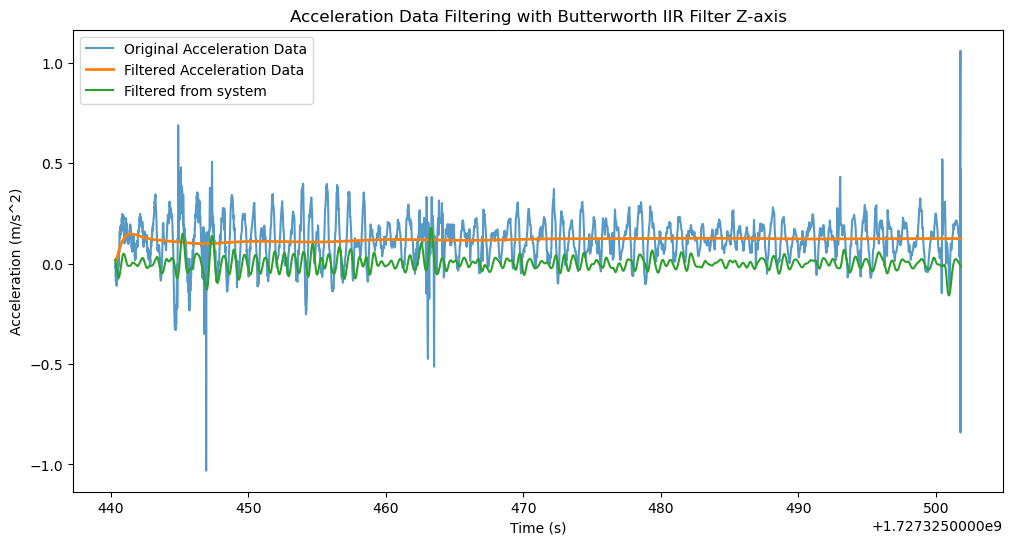

In [15]:
# Generate example data or use your actual IMU acceleration data
#t = np.linspace(0, 10, sample_rate * 10)  # 10 seconds of data
#acceleration_data = np.sin(2 * np.pi * 1 * t) + 0.5 * np.random.normal(size=t.shape)
t=np.array(df["Timestamp"])
acceleration_data=np.array(df["IMU_Linear_Acc_Z"]-df["IMU_Linear_Acc_Z"][0])

# Apply Butterworth filter
filtered_acceleration = butterworth_filter(acceleration_data, cutoff_frequency, order)
f2=butterworth_filter(filtered_acceleration,cutoff_frequency,order)

# Plot original vs filtered data
plt.figure(figsize=(12, 6))
plt.plot(t, acceleration_data, label="Original Acceleration Data", alpha=0.75)
plt.plot(t, filtered_acceleration, label="Filtered Acceleration Data", linewidth=2)
plt.plot(t,np.array(df["Filtered_Z"]),label="Filtered from system")
#plt.plot(t, f2, label="f2", linewidth=2)
plt.title("Acceleration Data Filtering with Butterworth IIR Filter Z-axis")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s^2)")
plt.legend()
plt.show()

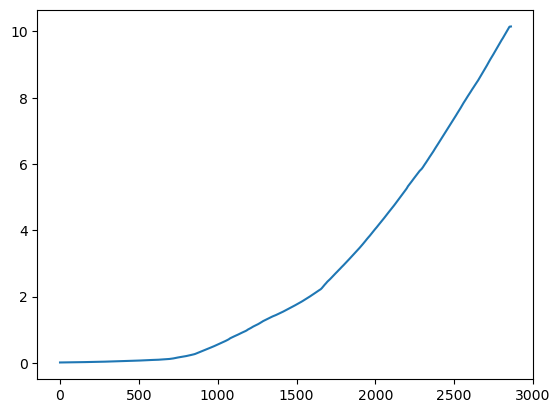

In [10]:
plt.plot(df["Pose_Y"])

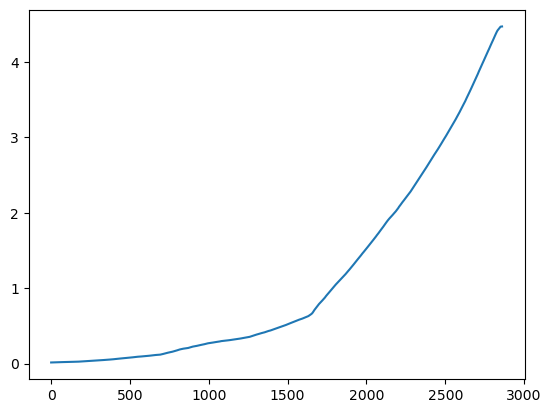

In [11]:
plt.plot(df["Pose_Z"])

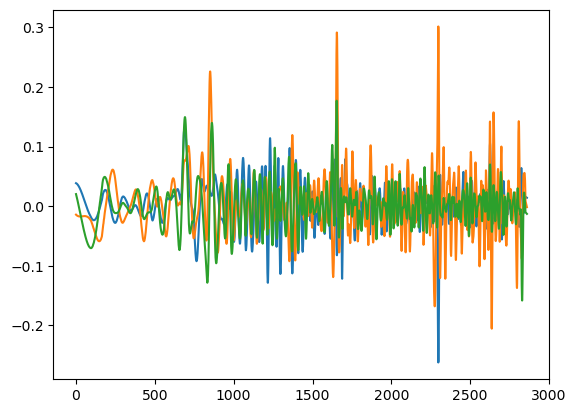

In [12]:
plt.plot(df["Filtered_X"])
plt.plot(df["Filtered_Y"])
plt.plot(df["Filtered_Z"])


In [14]:
gt_csvs=sorted(glob.glob("/home/saab/Desktop/13*_images/*.csv"))
gt_csvs

['/home/saab/Desktop/13th_Nov_images/output_1300.csv',
 '/home/saab/Desktop/13th_Nov_images/output_1301.csv',
 '/home/saab/Desktop/13th_Nov_images/output_1302.csv',
 '/home/saab/Desktop/13th_Nov_images/output_1304.csv',
 '/home/saab/Desktop/13th_Nov_images/output_1305.csv']

/home/saab/anaconda3/envs/vehicle/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/saab/anaconda3/envs/vehicle/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/saab/anaconda3/envs/vehicle/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/saab/anaconda3/envs/vehicle/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was 

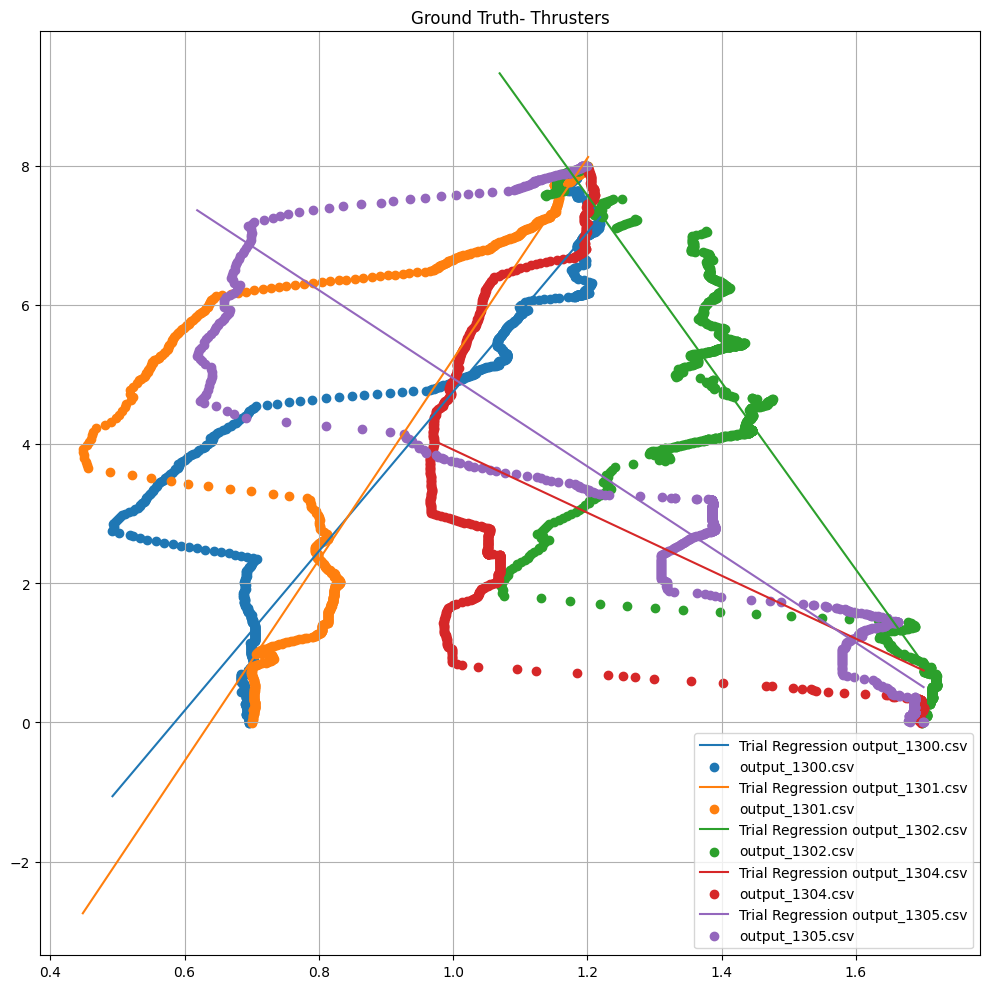

In [16]:
from sklearn.linear_model import HuberRegressor
from scipy.interpolate import UnivariateSpline
plt.figure(figsize=(10,10))
for file in gt_csvs[:]:
    df=pd.read_csv(file)
    div_flows_mean=df["Z"].to_numpy()
    displacements=np.sqrt(df["X"].to_numpy()**2 + df["Y"].to_numpy()**2)
    # Calculate cumulative displacement
    cumulative_displacement_x = np.cumsum(div_flows_mean)
    cumulative_displacement_y =np.cumsum(displacements)
    cumulative_displacement_x*=0.5/abs(cumulative_displacement_x[0]-cumulative_displacement_x[cumulative_displacement_x.shape[0]-1])
    cumulative_displacement_y*=8/abs(cumulative_displacement_y[0]-cumulative_displacement_y[cumulative_displacement_y.shape[0]-1])
    cumulative_displacement_x+=1.2
    cumulative_displacement_y=8-cumulative_displacement_y
    huber = HuberRegressor()
    huber.fit(cumulative_displacement_x.reshape(-1,1), cumulative_displacement_y.reshape(-1,1))  # X as a function of Y
   
    # Generate the regression line
    x_line = np.linspace(min(cumulative_displacement_x), max(cumulative_displacement_x), 1000).reshape(-1, 1)
    y_line = huber.predict(x_line)
    #sorted_indices = np.argsort(cumulative_displacement_x)
    #x_sorted = cumulative_displacement_x[sorted_indices]
    #y_sorted = cumulative_displacement_y[sorted_indices]
    #spline1 = UnivariateSpline(x_sorted, y_sorted,s=10)
    #y1_interp = spline1(cumulative_displacement_x)
    #plt.plot(cumulative_displacement_x,y1_interp,label='Spline '+file.split("/")[-1])
    # Plot the regression line
    plt.plot(x_line, y_line, label="Trial Regression "+file.split("/")[-1], linewidth=1.5)
    #plt.scatter(df["Pose_X"],df["Pose_Y"],label="Trial "+str(i))
    # Plot the cumulative displacement
    #plt.figure(figsize=(10, 6))
    #plt.plot(cumulative_displacement_y, marker='o', linestyle='-', color='b')
    plt.scatter(cumulative_displacement_x,cumulative_displacement_y,label=file.split("/")[-1])


    plt.title("Ground Truth- Thrusters")
    plt.legend()
    #plt.xlabel('Frame Number')
    #plt.ylabel('Cumulative Displacement')
    #plt.xlim(-0.5,0.5)
    plt.grid(True)
    #plt.show()
    plt.tight_layout()

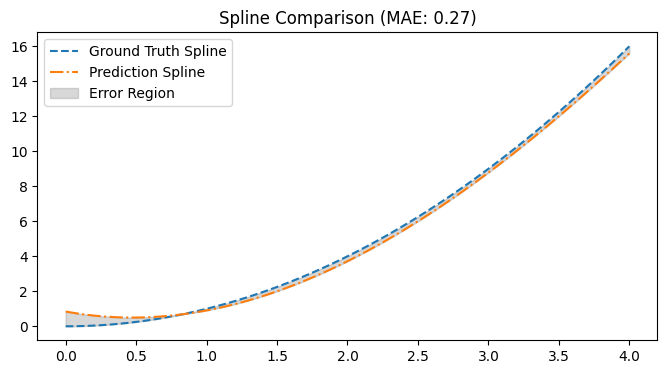

In [ ]:
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

# Example datasets (unequal sizes)
x1 = np.array([0, 1, 2, 3, 4])
y1 = np.array([0, 1, 4, 9, 16])  # Ground truth

x2 = np.array([0.5, 1.5, 2.5, 3.5])
y2 = np.array([0.5, 2, 6, 12])  # Prediction

# Fit cubic splines
spline1 = UnivariateSpline(x1, y1)
spline2 = UnivariateSpline(x2, y2)

# Generate a common grid
x_common = np.linspace(min(x1.min(), x2.min()), max(x1.max(), x2.max()), 100)

# Evaluate splines
y1_interp = spline1(x_common)
y2_interp = spline2(x_common)

# Compute error
error = np.abs(y1_interp - y2_interp)
mae = np.mean(error)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(x_common, y1_interp, label="Ground Truth Spline", linestyle="--")
plt.plot(x_common, y2_interp, label="Prediction Spline", linestyle="-.")
plt.fill_between(x_common, y1_interp, y2_interp, color="gray", alpha=0.3, label="Error Region")
plt.legend()
plt.title(f"Spline Comparison (MAE: {mae:.2f})")
plt.show()
